In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
%cd drive/MyDrive/oodn/

[Errno 2] No such file or directory: 'drive/MyDrive/oodn/'
/content/drive/MyDrive/oodn


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [4]:
df = pd.read_csv('oodn_odin_mcd_results_v1.csv',index_col=0)

In [86]:
cifar = df[df['Dataset']=='cifar']
cifar

,Dataset,Model Type,Activation,Optimizer,Trial,OOD Test Name,PostProcessor,AUROC,ACC
2,cifar,resnet50,softplus,SGD,2,cifar100,odin,78.41,75.58
3,cifar,resnet50,softplus,SGD,2,cifar100,mcd,65.18,76.60
4,cifar,resnet50,relu,SGD,1,cifar100,odin,77.49,78.18
5,cifar,resnet50,relu,SGD,1,cifar100,mcd,70.01,76.36
6,cifar,resnet50,relu,Adam,2,cifar100,odin,81.73,84.94
7,cifar,resnet50,relu,Adam,2,cifar100,mcd,66.73,82.64
8,cifar,resnet50,relu,SGD,0,cifar100,odin,78.29,78.59
9,cifar,resnet50,relu,SGD,0,cifar100,mcd,70.72,77.19
16,cifar,resnet50,softplus,Adam,2,cifar100,odin,79.64,85.12
17,cifar,resnet50,softplus,Adam,2,cifar100,mcd,66.56,82.82


In [6]:
mnist = df[df['Dataset']=='mnist']
mnist

,Dataset,Model Type,Activation,Optimizer,Trial,OOD Test Name,PostProcessor,AUROC,ACC
0,mnist,lenet,softplus,Adam,2,fashionmnist,odin,98.39,97.71
1,mnist,lenet,softplus,Adam,2,fashionmnist,mcd,97.16,97.71
10,mnist,lenet,softplus,SGD,0,fashionmnist,odin,99.17,98.33
11,mnist,lenet,softplus,SGD,0,fashionmnist,mcd,98.57,98.33
12,mnist,lenet,softplus,SGD,1,fashionmnist,odin,98.65,97.92
13,mnist,lenet,softplus,SGD,1,fashionmnist,mcd,96.24,97.92
14,mnist,lenet,relu,SGD,2,fashionmnist,odin,99.52,98.65
15,mnist,lenet,relu,SGD,2,fashionmnist,mcd,99.01,98.65
18,mnist,lenet,relu,SGD,0,fashionmnist,odin,99.40,98.21
19,mnist,lenet,relu,SGD,0,fashionmnist,mcd,97.94,98.21


In [89]:
cifar.groupby(['Dataset', 'Activation', 'Optimizer','PostProcessor'])['AUROC'].describe()

count       mean       std    min  \
Dataset Activation Optimizer PostProcessor                                      
cifar   relu       Adam      mcd              3.0  65.246667  3.021661  61.77   
                             odin             3.0  80.293333  2.805928  77.06   
                   SGD       mcd              3.0  70.603333  0.544457  70.01   
                             odin             3.0  78.370000  0.922605  77.49   
        softplus   Adam      mcd              3.0  66.416667  0.775005  65.58   
                             odin             3.0  80.206667  0.887938  79.64   
                   SGD       mcd              3.0  64.210000  0.860174  63.54   
                             odin             3.0  74.600000  4.620855  69.46   

                                               25%    50%     75%    max  
Dataset Activation Optimizer PostProcessor                                
cifar   relu       Adam      mcd            64.250  66.73  66.985  67.24  
                             odin           79.395  81.73  81.910  82.09  
                   SGD       mcd            70.365  70.72  70.900  71.08  
                             odin           77.890  78.29  78.810  79.33  
        softplus   Adam      mcd            66.070  66.56  66.835  67.11  
                             odin           79.695  79.75  80.490  81.23  
                   SGD       mcd            63.725  63.91  64.545  65.18  
                             odin           72.695  75.93  77.170  78.41

In [87]:
def subBarPlot1(df,ax,title):
  temp= df.groupby(['Dataset', 'Activation', 'Optimizer','PostProcessor'])['AUROC'].describe()[['mean','std']].reset_index()
  xnames = temp.apply(lambda x : f"{x['Activation']}+{x['Optimizer']}", axis=1)
  xname = []
  for n in xnames:
    if n not in xname:
      xname.append(n)
  x = np.arange(len(xname),dtype=float)
  width = 0.35
  rects1 = ax.bar(x - width/2, temp[temp['PostProcessor']=='odin']['mean'], width, label='ODIN',yerr =temp[temp['PostProcessor']=='odin']['std'],ecolor='black',capsize=10)
  rects2 = ax.bar(x + width/2, temp[temp['PostProcessor']=='mcd']['mean'], width, label='MCD',yerr =temp[temp['PostProcessor']=='mcd']['std'],ecolor='black',capsize=10)
  ax.set_ylabel('AUROC',fontdict={'fontsize': 16})
  ax.set_title(title,fontdict={'fontsize': 16})
  ax.set_xticks(x)
  ax.set_xticklabels(xname,fontdict={'fontsize': 12})
  ax.legend(loc='lower right')

In [67]:
def subBarPlot2(df,ax,title):
  temp= df.groupby(['Dataset','Optimizer','PostProcessor'])['AUROC'].describe()[['mean','std']].reset_index()
  xnames = temp.Optimizer
  xname = []
  for n in xnames:
    if n not in xname:
      xname.append(n)
  x = np.arange(len(xname),dtype=float)
  width = 0.35
  rects1 = ax.bar(x - width/2, temp[temp['PostProcessor']=='odin']['mean'], width, label='ODIN',yerr =temp[temp['PostProcessor']=='odin']['std'],ecolor='black',capsize=10)
  rects2 = ax.bar(x + width/2, temp[temp['PostProcessor']=='mcd']['mean'], width, label='MCD',yerr =temp[temp['PostProcessor']=='mcd']['std'],ecolor='black',capsize=10)
  ax.set_ylabel('AUROC',fontdict={'fontsize': 16})
  ax.set_title(title,fontdict={'fontsize': 16})
  ax.set_xticks(x)
  ax.set_xticklabels(xname,fontdict={'fontsize': 16})
  ax.legend(loc='lower right')

In [81]:
def subBarPlot3(df,ax,title):
  temp= df.groupby(['Dataset','Activation','PostProcessor'])['AUROC'].describe()[['mean','std']].reset_index()
  xnames = temp.Activation
  xname = []
  for n in xnames:
    if n not in xname:
      xname.append(n)
  x = np.arange(len(xname),dtype=float)
  width = 0.35
  rects1 = ax.bar(x - width/2, temp[temp['PostProcessor']=='odin']['mean'], width, label='ODIN',yerr =temp[temp['PostProcessor']=='odin']['std'],ecolor='black',capsize=10)
  rects2 = ax.bar(x + width/2, temp[temp['PostProcessor']=='mcd']['mean'], width, label='MCD',yerr =temp[temp['PostProcessor']=='mcd']['std'],ecolor='black',capsize=10)
  ax.set_ylabel('AUROC',fontdict={'fontsize': 16})
  ax.set_title(title,fontdict={'fontsize': 16})
  ax.set_xticks(x)
  ax.set_xticklabels(xname,fontdict={'fontsize': 16})
  ax.legend(loc='lower right')

From the post processor perspective, ODIN has a better general performance than MCD.

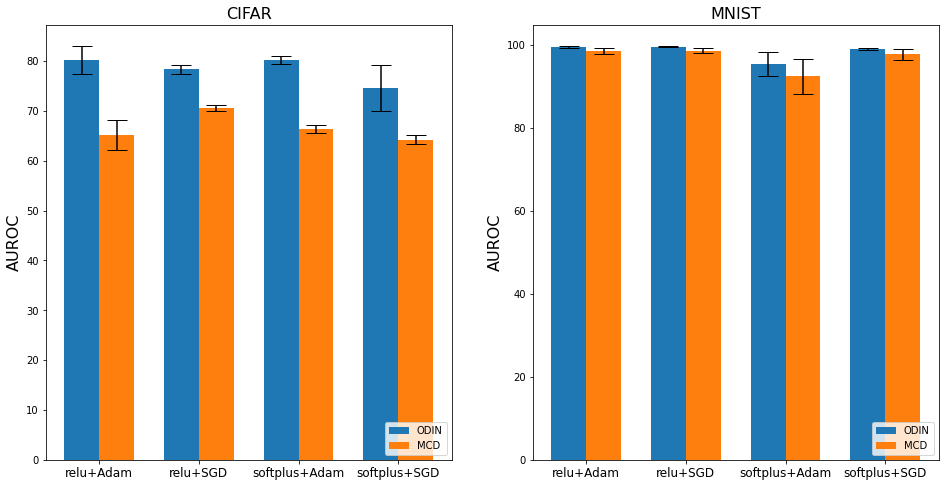

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
subBarPlot1(cifar,ax1,'CIFAR')
subBarPlot1(mnist,ax2,'MNIST')
plt.show()

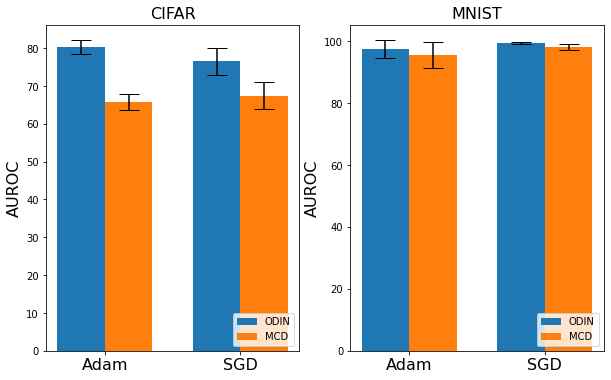

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6))
subBarPlot2(cifar,ax1,'CIFAR')
subBarPlot2(mnist,ax2,'MNIST')
plt.show()

When it comes to Optimizers, Adam is more robust in CIFAR dataset while SGD has a slight edge in MNIST dataset.

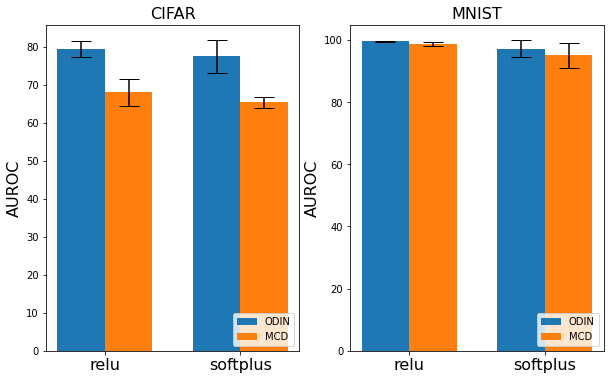

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6))
subBarPlot3(cifar,ax1,'CIFAR')
subBarPlot3(mnist,ax2,'MNIST')
plt.show()

Comparing the activations, ReLu is more robust and more consistent than MNIST in all the setting. Not only having higher average AUROC in all the case, it but also has smaller range of confidence interval in our trials.